In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')

In [4]:
boston = pd.read_csv("boston.csv")

**Variable Description**\
neighborhood &nbsp; &nbsp; &nbsp;  Name of the Boston neighborhood\
mv &nbsp; &nbsp; &nbsp; Median value of homes in thousands of 1970 dollars\
nox  &nbsp; &nbsp; &nbsp;                   Air pollution\
crim  &nbsp; &nbsp; &nbsp;                  Crime rate\
zn   &nbsp; &nbsp; &nbsp;                   Percent of land zoned for lots\
indus  &nbsp; &nbsp; &nbsp;                 Percent of business that is industrial or nonretail\
chas   &nbsp; &nbsp; &nbsp;                 On the Charles River (1) or not (0)\
rooms  &nbsp; &nbsp; &nbsp;                 Average number of rooms per home\
age    &nbsp; &nbsp; &nbsp;                 Percentage of homes built before 1940\
dis   &nbsp; &nbsp; &nbsp;                  Weighted distance to employment centers\
rad   &nbsp; &nbsp; &nbsp;                  Accessibility to radial highways\
tax   &nbsp; &nbsp; &nbsp;                  Tax rate\
ptratio   &nbsp; &nbsp; &nbsp;              Pupil/teach ratio in public schools\
lstat     &nbsp; &nbsp; &nbsp;              Percentage of population of lower socio-economic status\

In [5]:
boston.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
boston.tail()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,Winthrop,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,19.0


In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB


In [8]:
boston = boston.drop(['neighborhood'],axis= 1)

In [9]:
boston.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(boston, test_size=0.2, random_state = 42)

In [11]:
boston.corr()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.389582
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360386
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.484754
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175663
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.429300
rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.696304
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.377999
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249315
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.384766
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.471979



Histogram of Data of Boston DataFrame:


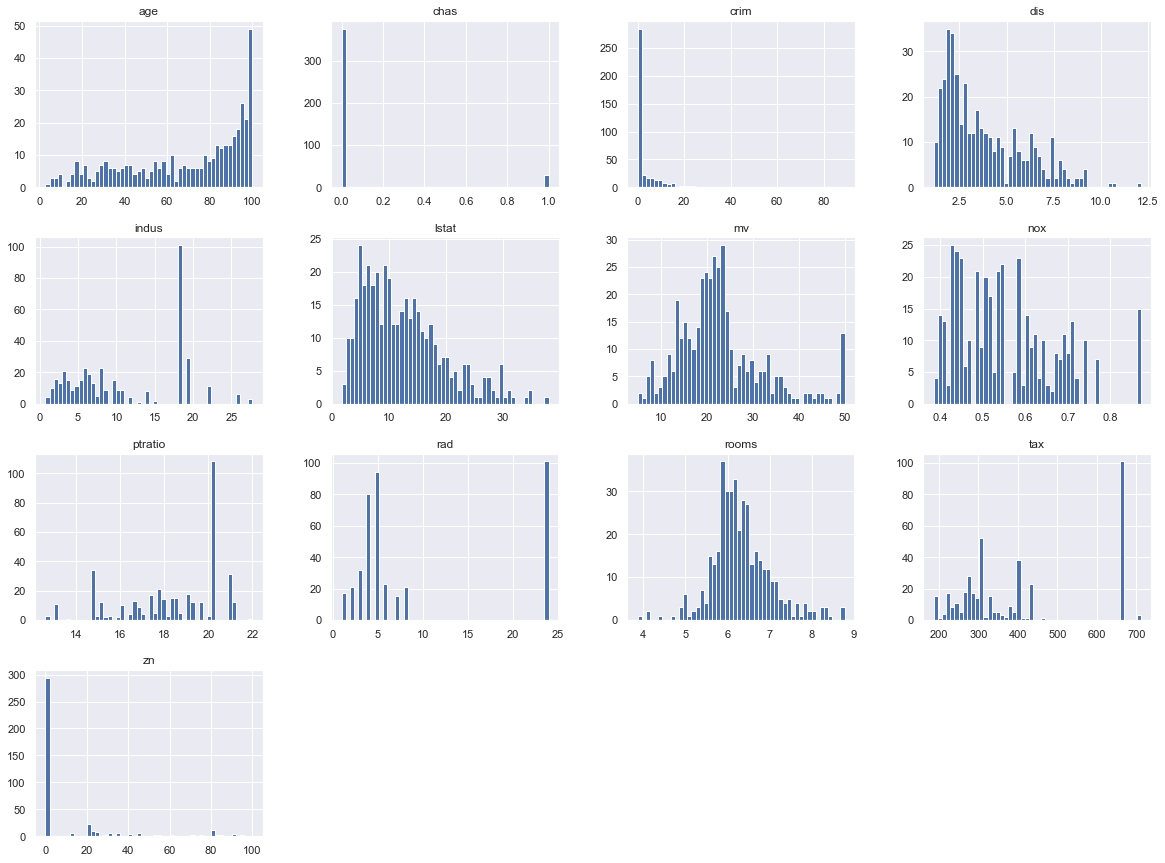

In [12]:
# histogram of data
print('\nHistogram of Data of Boston DataFrame:')
train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
train_set['logAge'] = np.log10(train_set['age'])
train_set['logLstat'] = np.log10(train_set['lstat'])
train_set['logDis']= np.log10(train_set['dis'])
train_set['logMv'] = np.log10(train_set['mv'])

<ipython-input-13-29fa3a5d89d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['logAge'] = np.log10(train_set['age'])
<ipython-input-13-29fa3a5d89d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['logLstat'] = np.log10(train_set['lstat'])
<ipython-input-13-29fa3a5d89d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [14]:
train_set['sqAge'] = np.square(train_set['age'])
train_set['sqLstat'] = np.square(train_set['lstat'])
train_set['sqDis'] = np.square(train_set['dis'])

<ipython-input-14-7ce37cf3e0da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['sqAge'] = np.square(train_set['age'])
<ipython-input-14-7ce37cf3e0da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['sqLstat'] = np.square(train_set['lstat'])
<ipython-input-14-7ce37cf3e0da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc45bddce80>,
      dtype=object)

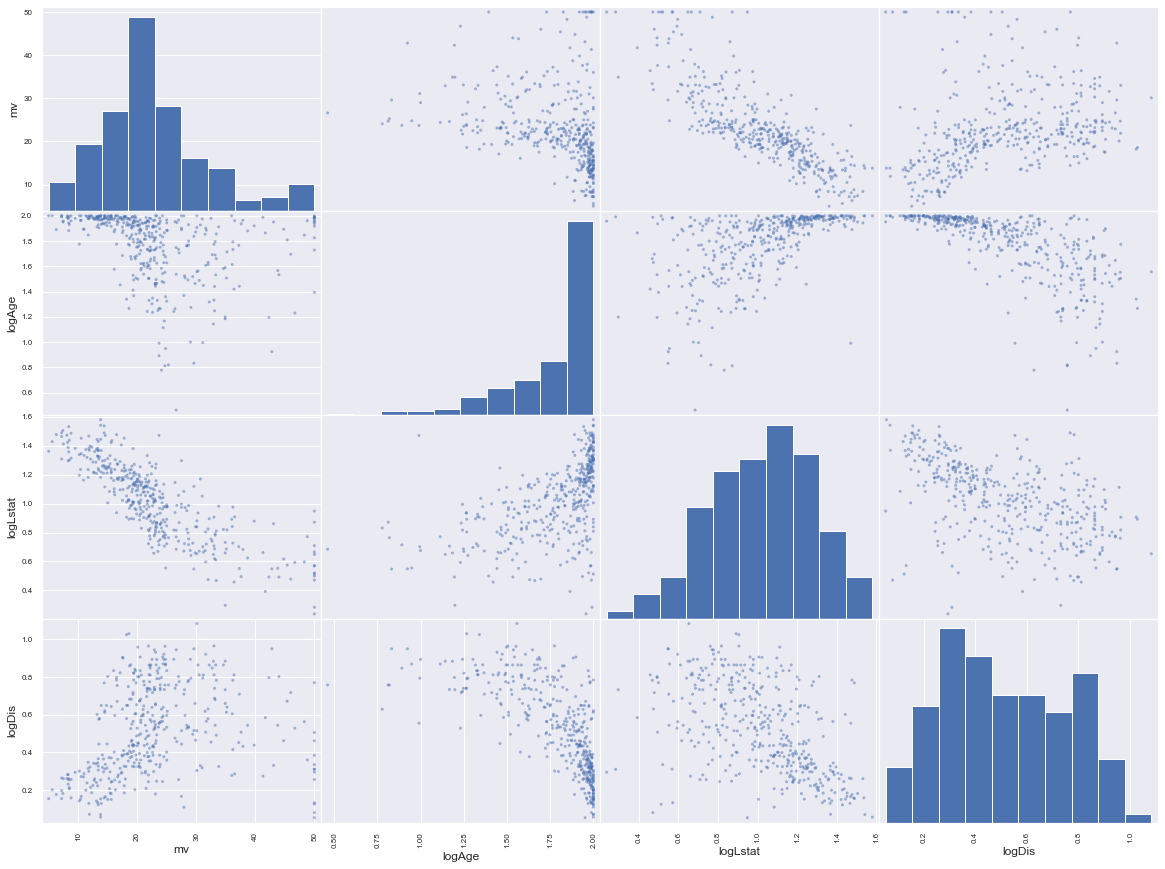

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_set[['mv', 'logAge','logLstat','logDis']], figsize=(20,15))

In [16]:
Q1 = train_set['mv'].quantile(0.25)
Q3 = train_set['mv'].quantile(0.75)
IQR = Q3 - Q1
L_Out = Q1 - 1.5 * IQR
U_Out = Q3 + 1.5 * IQR
print('L_Outlier=', L_Out)
print('U_Outlier=', U_Out)

L_Outlier= 3.0875000000000092
U_Outlier= 40.38749999999999


In [17]:
mv_med= train_set['mv'].median()

In [18]:
train_set.loc[(train_set['mv'] >= U_Out) | (train_set['mv'] <= L_Out),'mv'] =  mv_med

/Users/jasminesamuel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
train_set

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,logAge,logLstat,logDis,logMv,sqAge,sqLstat,sqDis
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,24.91,12.0,1.988113,1.396374,0.322364,1.079181,9467.29,620.5081,4.412940
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,8.47,19.9,1.752048,0.927883,0.653077,1.298853,3192.25,71.7409,20.237402
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,7.83,19.4,1.367356,0.893762,0.822214,1.287802,542.89,61.3089,44.098896
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,23.29,13.4,1.929930,1.367169,0.305738,1.127105,7242.01,542.4241,4.087675
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,11.28,18.2,1.841985,1.052309,0.579383,1.260071,4830.25,127.2384,14.413412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,18.66,19.5,1.963316,1.270912,0.344589,1.290035,8445.61,348.1956,4.888521
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,13.00,21.1,1.624282,1.113943,0.646306,1.324282,1772.41,169.0000,19.616041
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,5.99,24.5,1.472756,0.777427,0.921374,1.389166,882.09,35.8801,69.622336
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,23.27,13.4,1.975891,1.366796,0.327298,1.127105,8949.16,541.4929,4.514350


In [20]:
(train_set['mv'] >= U_Out) | (train_set['mv'] <= L_Out)

477    False
15     False
332    False
423    False
19     False
       ...  
106    False
270    False
348    False
435    False
102    False
Name: mv, Length: 404, dtype: bool

In [21]:
corr_matrix = train_set.corr()

In [22]:
corr_matrix['mv'].sort_values(ascending=False)

mv          1.000000
logMv       0.836645
rooms       0.519580
logDis      0.470785
dis         0.404733
zn          0.396503
sqDis       0.329670
chas        0.054941
logAge     -0.428386
ptratio    -0.450305
crim       -0.474918
age        -0.495594
rad        -0.513277
sqAge      -0.518774
nox        -0.560027
tax        -0.583354
indus      -0.607141
sqLstat    -0.672598
logLstat   -0.722319
lstat      -0.740004
Name: mv, dtype: float64

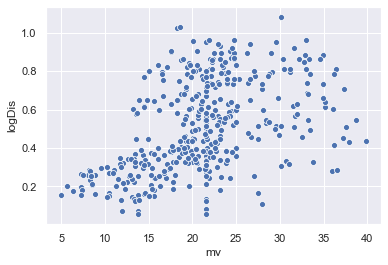

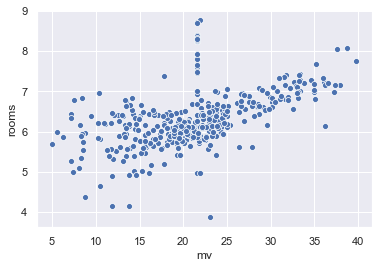

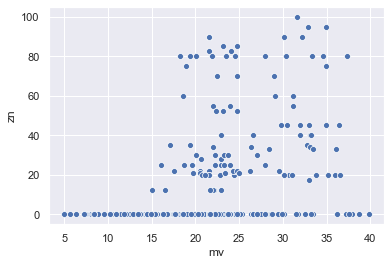

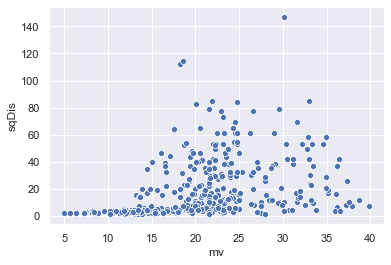

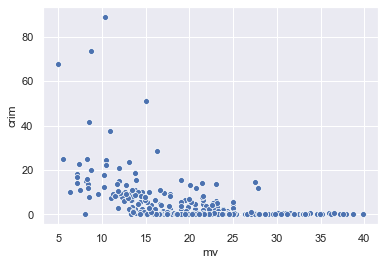

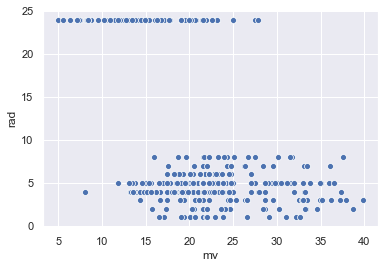

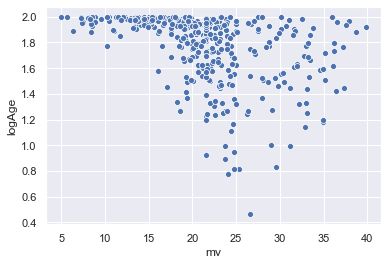

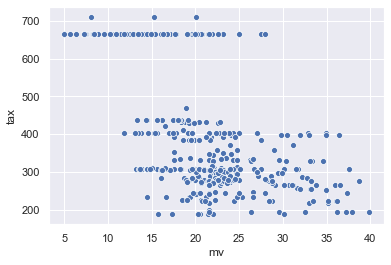

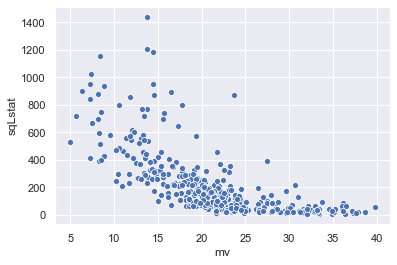

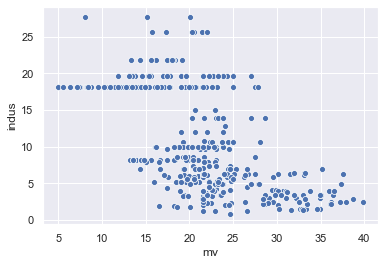

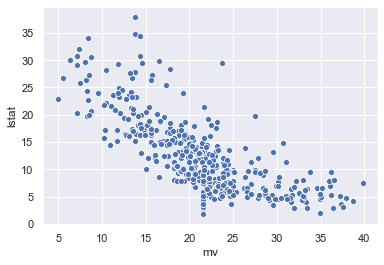

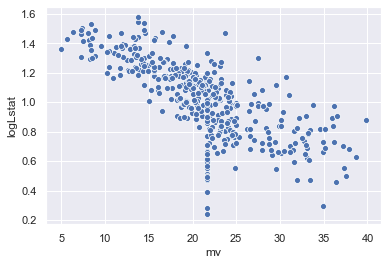

In [23]:
attributes = ['logDis', 'rooms','zn','sqDis','crim','rad',
             'logAge','tax','sqLstat','indus','lstat','logLstat']

for j in attributes:
    sns.scatterplot(x=train_set['mv'],y=train_set[j])
    plt.show()
        

In [24]:
def train_attributes(data,attribute_list):
    return data[attribute_list]

In [25]:
def labels(data,label):
    return data[label]

In [26]:
train_predictors = ['logDis','rooms','logAge','sqLstat','lstat']
train_df = train_attributes(train_set, train_predictors)

In [27]:
train_labels = labels(train_set, 'mv')
train_labels

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: mv, Length: 404, dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler 

In [29]:
scaler = StandardScaler()
scaler.fit(train_df)
train = scaler.fit_transform(train_df)

In [30]:
train_df

,logDis,rooms,logAge,sqLstat,lstat
477,0.322364,5.304,1.988113,620.5081,24.91
15,0.653077,5.834,1.752048,71.7409,8.47
332,0.822214,6.031,1.367356,61.3089,7.83
423,0.305738,6.103,1.929930,542.4241,23.29
19,0.579383,5.727,1.841985,127.2384,11.28
...,...,...,...,...,...
106,0.344589,5.836,1.963316,348.1956,18.66
270,0.646306,5.856,1.624282,169.0000,13.00
348,0.921374,6.635,1.472756,35.8801,5.99
435,0.327298,6.629,1.975891,541.4929,23.27


In [31]:
scaled_train = pd.DataFrame(train_df, index=train_df.index,columns=train_df.columns)

In [32]:
scaled_train

,logDis,rooms,logAge,sqLstat,lstat
477,0.322364,5.304,1.988113,620.5081,24.91
15,0.653077,5.834,1.752048,71.7409,8.47
332,0.822214,6.031,1.367356,61.3089,7.83
423,0.305738,6.103,1.929930,542.4241,23.29
19,0.579383,5.727,1.841985,127.2384,11.28
...,...,...,...,...,...
106,0.344589,5.836,1.963316,348.1956,18.66
270,0.646306,5.856,1.624282,169.0000,13.00
348,0.921374,6.635,1.472756,35.8801,5.99
435,0.327298,6.629,1.975891,541.4929,23.27


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lin_reg = LinearRegression()

In [35]:
lin_reg.fit(scaled_train,train_labels)

LinearRegression()

In [36]:
lin_reg.intercept_,lin_reg.coef_

(25.54024520902759,
 array([ 2.17606985,  0.78808966, -0.40093179,  0.01234001, -0.98860606]))

In [37]:
from sklearn.metrics import mean_squared_error


In [38]:
training_predictions = lin_reg.predict(scaled_train)
lin_mse = mean_squared_error(train_labels, training_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.351404172323732

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

In [40]:
regr = linear_model.LinearRegression()

In [41]:
scores = cross_val_score(regr, scaled_train, train_labels,
                        scoring = 'neg_mean_squared_error', cv=10)

In [42]:
lr_rmse_scores = np.sqrt(-scores)

In [43]:
def display_scores(scores):
    print(f'scores:{scores}')
    print(f'mean: {scores.mean()}')
    print(f'standard deviation: {scores.std()}')

In [44]:
display(lr_rmse_scores)

array([5.61975647, 3.73612839, 4.34140404, 3.72280911, 4.84903228,
       4.62698951, 4.80244839, 4.31721558, 4.54211453, 3.44132676])

In [45]:
lr_rmse_scores.std()

0.6125173798144966

In [46]:
lr_rmse_scores.mean()

4.399922505250497

#### when we examined correlates we saw that there may be some multicollinearity. When your multipe regression suffers from multicollinearity the least squares are unbiased, but the variances tend to be large. Looking at our first examination of the full test set we say some predictions that were pretty accurate, and others that have high variance. 

#### We also see large positive and negative coefficients which can be a result of correlated variables and have implications for prediction 

#### Implementing ridge regression can help us by imposing restrictions on our coefficients

#### Let's implement ridge regression on our data! We will use grid search that will allow us to automatically perform cross validation with a range of reguarlization paramters to find  optimal value of alpha 

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [48]:
ridge= Ridge()

In [49]:
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regression.fit(scaled_train,train_labels)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [50]:
ridge_regression.best_params_

{'alpha': 20}

In [51]:
ridge_regression.best_score_

-19.546865622892334

In [52]:
ridge_reg_2 = Ridge(alpha =20, solver = 'cholesky')
ridge_reg_2.fit(scaled_train,train_labels)

Ridge(alpha=20, solver='cholesky')

In [53]:
ridge_reg_2.intercept_,ridge_reg_2.coef_

(27.696562465262286,
 array([ 0.90871544,  0.63988123, -0.50509991,  0.01239737, -1.02017228]))

In [54]:
lin_reg.intercept_,lin_reg.coef_

(25.54024520902759,
 array([ 2.17606985,  0.78808966, -0.40093179,  0.01234001, -0.98860606]))

In [55]:
scaled_train

,logDis,rooms,logAge,sqLstat,lstat
477,0.322364,5.304,1.988113,620.5081,24.91
15,0.653077,5.834,1.752048,71.7409,8.47
332,0.822214,6.031,1.367356,61.3089,7.83
423,0.305738,6.103,1.929930,542.4241,23.29
19,0.579383,5.727,1.841985,127.2384,11.28
...,...,...,...,...,...
106,0.344589,5.836,1.963316,348.1956,18.66
270,0.646306,5.856,1.624282,169.0000,13.00
348,0.921374,6.635,1.472756,35.8801,5.99
435,0.327298,6.629,1.975891,541.4929,23.27


In [56]:
training_predictions - train_labels

477    0.655561
15     3.468441
332    5.149959
423    0.510378
19     2.794550
         ...   
106   -3.548422
270   -0.955939
348    2.204731
435    0.961682
102    3.042886
Name: mv, Length: 404, dtype: float64

In [57]:
test_set

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,34.37,17.9
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,18.05,9.6
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,21.22,17.2
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,12.86,22.5


In [58]:
test_set['logAge'] = np.log10(test_set['age'])
test_set['logLstat'] = np.log10(test_set['lstat'])
test_set['logDis']= np.log10(test_set['dis'])
test_set['logMv'] = np.log10(test_set['mv'])
test_set['sqAge'] = np.square(test_set['age'])
test_set['sqLstat'] = np.square(test_set['lstat'])
test_set['sqDis'] = np.square(test_set['dis'])

<ipython-input-58-70eebe8945b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['logAge'] = np.log10(test_set['age'])
<ipython-input-58-70eebe8945b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['logLstat'] = np.log10(test_set['lstat'])
<ipython-input-58-70eebe8945b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [59]:
test_set

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,logAge,logLstat,logDis,logMv,sqAge,sqLstat,sqDis
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,9.04,23.6,1.924796,0.956168,0.422639,1.372912,7072.81,81.7216,7.002904
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,3.53,32.4,1.517196,0.547775,0.610405,1.510545,1082.41,12.4609,16.626822
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6,1.994757,1.256958,0.271400,1.133539,9761.44,326.5249,3.489798
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52,22.8,0.892095,0.741939,0.723234,1.357935,60.84,30.4704,27.955541
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,17.27,16.1,1.962843,1.237292,0.374418,1.206826,8427.24,298.2529,5.608371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,34.37,17.9,2.000000,1.536180,0.191423,1.252853,10000.00,1181.2969,2.414605
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,18.05,9.6,1.969882,1.256477,0.301594,0.982271,8704.89,325.8025,4.010407
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,21.22,17.2,2.000000,1.326745,0.183981,1.235528,10000.00,450.2884,2.333256
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,12.86,22.5,1.654177,1.109241,0.646129,1.352183,2034.01,165.3796,19.600100


#### Change MV outliers

In [60]:
# add this function above 
def outliers(dataset,attribute):
    q1 = dataset[attribute].quantile(0.25)
    q3 = dataset[attribute].quantile(0.75)
    IQR = q3 - q1
    L_out = q1 - 1.5* IQR
    U_out = q3 + 1.5* IQR
    return L_out, U_out

In [61]:
test_set_outliers = outliers(test_set,'mv')
test_set_outliers

(6.074999999999996, 34.87500000000001)

In [62]:
test_set_med = test_set['mv'].median()
test_set_med

20.15

In [63]:
test_set.loc[(test_set['mv']>= test_set_outliers[1]) | (test_set['mv'] <= test_set_outliers[0]),'mv']= test_set_med

/Users/jasminesamuel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [64]:
test_labels = labels(test_set,'mv')
test_labels

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: mv, Length: 102, dtype: float64

In [65]:
test_df = train_attributes(test_set, train_predictors)
test_df

,logDis,rooms,logAge,sqLstat,lstat
173,0.422639,6.416,1.924796,81.7216,9.04
274,0.610405,6.758,1.517196,12.4609,3.53
491,0.271400,5.983,1.994757,326.5249,18.07
72,0.723234,6.065,0.892095,30.4704,5.52
452,0.374418,6.297,1.962843,298.2529,17.27
...,...,...,...,...,...
412,0.191423,4.628,2.000000,1181.2969,34.37
436,0.301594,6.461,1.969882,325.8025,18.05
411,0.183981,6.657,2.000000,450.2884,21.22
86,0.646129,6.015,1.654177,165.3796,12.86


#### Standardize to z scores

In [66]:
test = scaler.fit(test_df)
test = scaler.fit_transform(test_df)

In [67]:
scaled_test = pd.DataFrame(test, index= test_df.index, columns= test_df.columns)
scaled_test

,logDis,rooms,logAge,sqLstat,lstat
173,-0.424094,0.386286,0.559736,-0.611333,-0.608716
274,0.424429,0.904026,-0.973668,-0.892549,-1.373038
491,-1.107551,-0.269215,0.822931,0.382628,0.643885
72,0.934311,-0.145078,-3.325317,-0.819426,-1.096995
452,-0.642006,0.206137,0.702869,0.267837,0.532912
...,...,...,...,...,...
412,-1.468971,-2.320494,0.842656,3.853213,2.904947
436,-0.971102,0.454410,0.729349,0.379695,0.641110
411,-1.502601,0.751127,0.842656,0.885139,1.080838
86,0.585870,-0.220771,-0.458342,-0.271661,-0.078823


In [68]:
testing_predictions_lr = lin_reg.predict(scaled_test)

In [69]:
testing_predictions_lr[0:5]

array([25.29163681, 28.91304029, 21.95620658, 29.86664495, 23.50031319])

In [70]:
testing_predictions_lr - test_labels

173     1.691637
274    -3.486960
491     8.356207
72      7.066645
452     7.400313
         ...    
412    -0.547243
436    13.263636
411     4.266987
86      4.399488
75      6.429671
Name: mv, Length: 102, dtype: float64

In [71]:
test_lr_mse = mean_squared_error(test_labels, testing_predictions_lr)
test_lr_rmse = np.sqrt(lin_mse)
test_lr_rmse

4.351404172323732

In [72]:
testing_predictions_ridge = ridge_reg_2.predict(scaled_test)

In [73]:
test_ridge_mse = mean_squared_error(test_labels, testing_predictions_ridge)
test_ridge_rmse = np.sqrt(test_ridge_mse)
test_ridge_rmse

8.85189805897865

In [77]:
lin_reg.intercept_,lin_reg.coef_

(25.54024520902759,
 array([ 2.17606985,  0.78808966, -0.40093179,  0.01234001, -0.98860606]))

In [76]:
ridge_reg_2.intercept_,ridge_reg_2.coef_

(27.696562465262286,
 array([ 0.90871544,  0.63988123, -0.50509991,  0.01239737, -1.02017228]))

#### Linear regression performs better than ridge regression 
- RMSE for lr model is 4.35
- RMSE for ridge regression is 8.85
Restricting the coefficients doesn't help predictions 


Based on this analysis we would not recommend to management deploying our linear regression model. Although the linear regression outperformed out ridge regression, our observations on average are off by 20%. We would recommend collecting more data if that is an option. Another recommendation is that we identify other features that add predictive value. 


In [79]:
train_predictors 

['logDis', 'rooms', 'logAge', 'sqLstat', 'lstat']

In [80]:
train_labels.mean()

21.149752475247535

In [81]:
test_lr_rmse/train_labels.mean()

0.20574255785812942

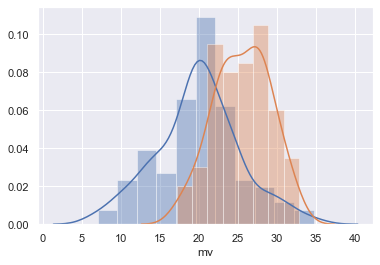

In [85]:
sns.distplot(test_labels)
sns.distplot(testing_predictions_lr)

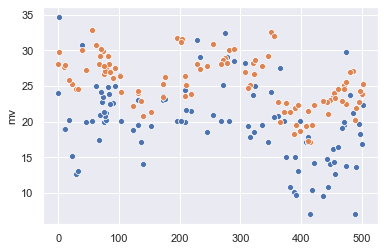

In [92]:
sns.scatterplot(test_labels.index, test_labels)
sns.scatterplot(test_labels.index,testing_predictions_lr)
